# Load the libraries

In [1]:
import os
import cv2
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout,BatchNormalization, Flatten
import matplotlib.pyplot as plt

In [2]:
img_size = 70

We have two categories here Parasitized and Uninfected  lets first create different lists for these categories and visualize them out

In [3]:
#Separating out Parasitized and Uninfected images
DATADIR ='C:/Users/UPES/Pictures/ml_python/Deep Learning/cell_images/'
data = []
target = []
CATEGORIES = ['Parasitized','Uninfected']
Parasitized_images = os.listdir(DATADIR+'Parasitized/')
p = []
for i, img_name in enumerate(Parasitized_images):
    try:
        if(img_name.endswith('png')):
            img_array = cv2.imread(DATADIR+'Parasitized/'+img_name)
            new_img = cv2.resize(img_array,(img_size, img_size))
            p.append(new_img)
    except Exception:
        pass

In [4]:
Uninfected_images = os.listdir(DATADIR+'Uninfected/')
U = []
for i, img_name in enumerate(Uninfected_images):
    try:
        if(img_name.endswith('png')):
            img_array = cv2.imread(DATADIR+'Uninfected/'+img_name)
            new_img = cv2.resize(img_array,(img_size, img_size))
            U.append(new_img)
    except Exception:
        pass

In [5]:
print(len(p))
print(len(U))

13779
13779


# Visualization

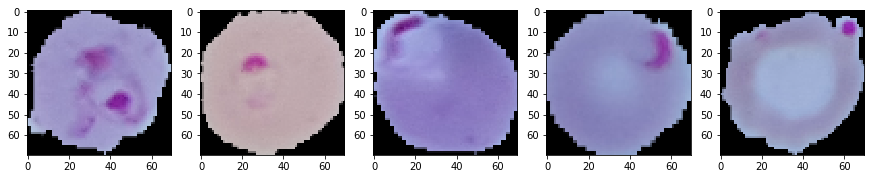

In [6]:
import numpy as np
plt.figure(figsize = (15, 10))
for i, image_index in enumerate(np.random.randint(len(Parasitized_images), size = 5)):
    plt.subplot(1, 5, i+1)
    plt.imshow(p[image_index])

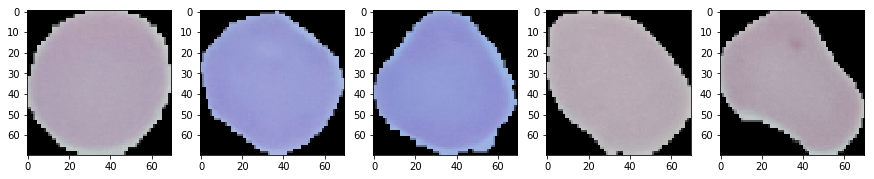

In [7]:
plt.figure(figsize = (15, 10))
for i, image_index in enumerate(np.random.randint(len(Uninfected_images), size = 5)):
    plt.subplot(1, 5, i+1)
    plt.imshow(U[image_index])

In [ ]:
plt.gray
plt.figure(figsize = (15, 10))
for i, image_index in enumerate(np.random.randint(len(Uninfected_images), size = 5)):
    plt.subplot(1, 5, i+1)
    plt.imshow(U[image_index])

Before applying any algorithm,all the images need to be converted into grayscale

In [ ]:
img_size =100
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #1st category
    class_num = CATEGORIES.index(category)
    for file in os.listdir(path):
        if(file.endswith('png')):
            img_array = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size,img_size))
            data.append([new_array, class_num])
            target.append(class_num)

In [ ]:
#random.shuffle(data)
len(data)

In [ ]:
len(target)

# Build model

In [32]:
model = Sequential()
#Two convolutional layers followed by 2 dense layers
#first conv layer
model.add(Conv2D(32,3,3, input_shape =(100,100,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), data_format ='channels_last'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

#second conv layer
model.add(Conv2D(32,3,3,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , data_format ='channels_last'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(activation = 'relu', units = 512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'relu', units = 512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'relu', units = 256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation ='sigmoid', units = 2))

#compile
model.compile(optimizer ='adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 33, 33, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_v1_10 (B (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
batch_normalization_v1_11 (B (None, 2, 2, 32)          128       
__________

In [33]:
#split the dataset into train and test before fitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, target, test_size = 0.2, random_state = 0)

In [35]:
history = model.fit(x_train, 
                         y_train
                   )

ValueError: Error when checking input: expected conv2d_4_input to have 4 dimensions, but got array with shape (2, 1)